# Model-Free Regression Variable Selection Explained
In this tutorial we show how to run the model-free variable selection analysis provided in the `kxy` package on a regression problem. 

We use the UCI Yacht Hydrodynamics dataset.

In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

# Required imports
import pandas as pd
import kxy

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'\
                 '00243/yacht_hydrodynamics.data', sep='[ ]{1,2}',\
                 names=['Longitudinal Position', 'Prismatic Coeefficient',\
                        'Length-Displacement', 'Beam-Draught Ratio',\
                        'Length-Beam Ratio', 'Froude Number',\
                        'Residuary Resistance'])
df.rename(columns={col: col.title() for col in df.columns}, inplace=True)

## How To Generate The Variable Selection Analysis

In [3]:
var_selection_analysis = df.kxy.variable_selection_analysis('Residuary Resistance')

In [4]:
var_selection_analysis

,Variable,Selection Order,Univariate Achievable R^2,Maximum Marginal R^2 Increase,Running Achievable R^2,Univariate Mutual Information,Conditional Mutual Information,Univariate Maximum True Log-Likelihood Increase Per Sample,Maximum Marginal True Log-Likelihood Increase Per Sample,Running Mutual Information,Running Maximum Log-Likelihood Increase Per Sample
0,Froude Number,1,0.988036,0.988036,0.988036,2.212932,2.212932,2.212932,2.212932,2.212932,2.212932
1,Beam-Draught Ratio,2,0.001181,0.002810,0.990847,0.000591,0.133881,0.000591,0.133881,2.346813,2.346813
2,Length-Displacement,3,0.002635,0.002020,0.992866,0.001319,0.124648,0.001319,0.124648,2.471462,2.471462
3,Longitudinal Position,4,0.001964,0.001539,0.994406,0.000983,0.121544,0.000983,0.121544,2.593006,2.593006
4,Prismatic Coeefficient,5,0.001355,0.001162,0.995567,0.000678,0.116361,0.000678,0.116361,2.709367,2.709367
5,Length-Beam Ratio,6,0.000206,0.000874,0.996441,0.000103,0.109806,0.000103,0.109806,2.819172,2.819172


**Note:** the same syntax is used for classification problems. The type of supervised learning problem is inferred based on the label column.

## Column Meaning

* `Selection Order`: Order in which variables are selected, from the most important (1) to the least important. The first variable selected is the one with the highest mutual information with the label (i.e. that is the most useful when used in isolation). The $(i+1)$-th variable selected is the variable, among all variables not yet selected, that complements all $i$ variables previously selected the most.
* `Univariate Achievable R^2`: The highest $R^2$ achievable by a model using the variable in isolation to predict the label.
* `Maximum Marginal R^2 Increase`: The highest amount by which the $R^2$ can be increased as a result of including this variable to all previously selected variables.
* `Running Achievable R^2`: The highest $R^2$ achievable by a model using all variables selected so far to predict the label.
* `Univariate Mutual Information`: Maximum-entropy model-free estimate of the mutual information between the variable and the label, under the true data generating distribution.
* `Conditional Mutual Information`: Maximum-entropy model-free estimate of the mutual information between the variable and the label conditional on all variables previously selected (if any), under the true data generating distribution.
* `Running Mutual Information`: Maximum-entropy model-free estimate of the mutual information between all variables selected so far (including this variable) and the label, under the true data generating distribution.
* `Univariate Maximum True Log-Likelihood Increase Per Sample`: The highest amount by which the true likelihood per sample of a model using the variable in isolation to predict the label can increase over the naive baseline strategy consisting of always predicting the mode of the true unconditional distribution of the label.
* `Maximum Marginal True Log-Likelihood Increase Per Sample`: The highest amount by which the true likelihood per sample of a model using all variables selected prior to this one to predict the label can increase as a result of adding this variable.
* `Running Maximum Log-Likelihood Increase Per Sample`: The highest amount by which the true likelihood per sample of a model using all variables selected so far, including this one, to predict the label can increase over the naive baseline strategy consisting of always predicting the mode of the true unconditional distribution of the label.

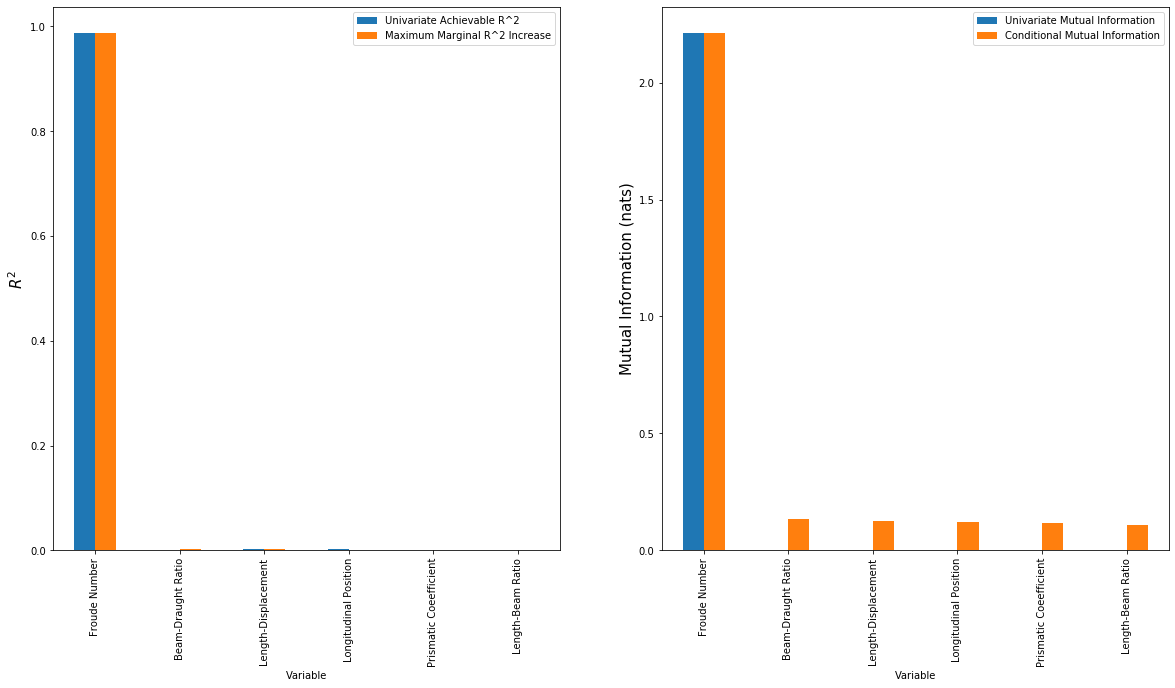

In [5]:
import pylab as plt
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
var_selection_analysis[['Variable', 'Univariate Achievable R^2', \
    'Maximum Marginal R^2 Increase']]\
    .plot.bar(x='Variable', rot=90, ax=ax[0])
ax[0].set_ylabel(r'$R^2$', fontsize=15)
var_selection_analysis[['Variable', 'Univariate Mutual Information', \
    'Conditional Mutual Information']]\
    .plot.bar(x='Variable', rot=90, ax=ax[1])
ax[1].set_ylabel('Mutual Information (nats)', fontsize=15)
plt.show()